<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PSUUIVD/colab_intro_deepdream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Úvod do Google Colab

V tomto notebooku si ukážeme ako pracovať v Google Colab a ako si v ňom zobrazovať obrázky z OpenCV.

## Google Colab

Google Colab (http://colab.research.google.com) je nespoplatnená služba na ktorej je možné spúštať tzv. ipython noteboky. Služba poskytuje k dispozícii aj výpočty na GPU a CPU. Pre využitie tejto služby je nutné mať Google účet. Tieto notebooky môžeme spúšťať aj lokálne pomocou príkazu `jupyter notebook` v zložke kde máme uložené ipynb súbory.

V notebookoch máme dva druhy buniek. Textové, ako napr. tento a kód. Bunky s kódom môžeme spúštať tlačidlom play naľavo od bunky, alebo v prostredí Colab naraz od prvej až po poslednú výberom Runtime -> Run All. Defaultne notebook nemá pripojené GPU, to môžeme zmeniť zavolaním Runtime -> Change runtime type. Bunky majú spoločný scope ale je treba dávať pozor na poradie spúštania jednotlivých buniek. Preto je často vhodné použiť Runtime -> Restart and run all.

V nasledujúcej bunke si môžete otestovať spustenie python kódu.

In [ ]:
a = [5,'Hello']
s = '{} World!'
print(s.format(a[1]))

def najlepsia_funkcia(arg):
  return arg + 5

print(najlepsia_funkcia(8))

Hello World!
13


Keď sme v Google Colab chceli by sme mať prístup k súborom. To je najjednoduchšie pomocou pripojenia Google Drive k našej inštancii. To sa robí následovne:
(V Google Drive si vyrobte zložku Colab, alebo upravte na drive)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Môžeme potom k zložke pristupovať.

In [ ]:
import os
os.listdir(root_path)

['mnist-fc-trained.h5', 'cifar-fc-trained.h5']

Takisto môžeme volať unixové príkazy pomocou výkričníka.

In [ ]:
!pwd
!ls
!mkdir random_dir
!ls
!wget https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png
!ls

/content
bird.jpg  googlelogo_color_272x92dp.png    random_dir
gdrive	  googlelogo_color_272x92dp.png.1  sample_data
mkdir: cannot create directory ‘random_dir’: File exists
bird.jpg  googlelogo_color_272x92dp.png    random_dir
gdrive	  googlelogo_color_272x92dp.png.1  sample_data
--2022-11-19 17:08:47--  https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png
Resolving www.google.com (www.google.com)... 64.233.182.103, 64.233.182.106, 64.233.182.104, ...
Connecting to www.google.com (www.google.com)|64.233.182.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5969 (5.8K) [image/png]
Saving to: ‘googlelogo_color_272x92dp.png.2’

googlelogo_color_27 100%[===================>]   5.83K  --.-KB/s    in 0s      

2022-11-19 17:08:47 (91.5 MB/s) - ‘googlelogo_color_272x92dp.png.2’ saved [5969/5969]

bird.jpg		       googlelogo_color_272x92dp.png.1	sample_data
gdrive			       googlelogo_color_272x92dp.png.2
googlelogo_color_272x92dp.png  

Najpohodlnejšia možnosť je použiť inferface naľovo a pozrieť si záložku Files

**<----**

## OpenCV

Teraz si ukážeme ako pracovať s OpenCV v Colabe.

In [ ]:
import cv2

Načítanie obrazu je v OpenCV jednoduché. Načítame si obrázok, ktorý sme stiahli cez v úvodnej časti cvičenia. Vidíme, že tento obrázok je NumPy pole. S rozmermi šírka x výška x 3. Posledný kanál reprezentuje tri RGB zložky. Máme teda tri matice a z nich každá intenzitu jednej z troch zložiek. Je treba si uvedomiť, že **OpenCV defaultne pracuje s obrazom v poradí BGR!**

In [ ]:
img = cv2.imread('googlelogo_color_272x92dp.png')
print(type(img))
print(img.shape)
print(img.dtype)

<class 'numpy.ndarray'>
(92, 272, 3)
uint8


Zobrazovať obrázok obrázky si nebudeme priamo pomocou OpenCV. Keďže sme v notebooku potrebujeme na to inú knižnicu. Konkrétne matplotlib. Pri zobrazovaní obrazu je nutné prekonvertovať obraz z BGR na RGB.

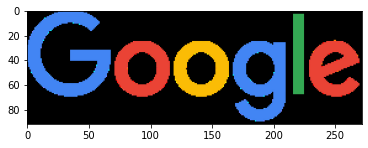

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img[:,:,::-1])
plt.show()

Môžeme zobraziť aj jednotlivé kanály.

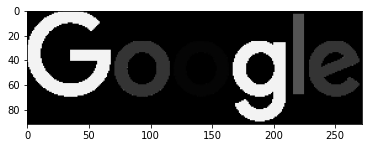

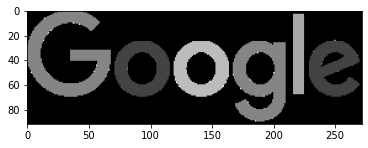

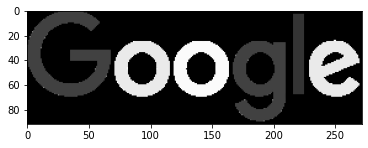

In [ ]:
plt.imshow(img[:,:,0],cmap='gray')
plt.show()
plt.imshow(img[:,:,1],cmap='gray')
plt.show()
plt.imshow(img[:,:,2],cmap='gray')
plt.show()

Obrázky sú defualtne v uint8, teda prirodzené čísla od 0 do 255. Niekedy chceme dostať tieto hodnoty do floatov a vtedy sa štandardne očakávajú hodnoty medzi 0 a 1.

float64


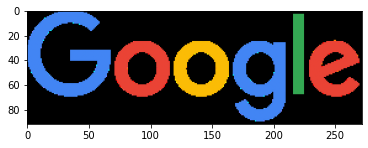

In [ ]:
img_f = img / 255
print(img_f.dtype)
plt.imshow(img_f[:,:,::-1])
plt.show()

S obrazom môžeme jednoducho manipulovať. Napríklad zosíliť jeden kanál.

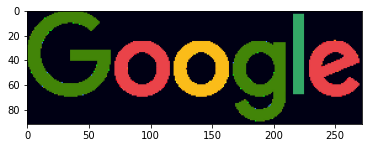

In [ ]:
img[:,:,0] += 20
plt.imshow(img[:,:,::-1])
plt.show()

Často je vhodné obraz prekonvertovať na šedotónový. Stiahneme si teda obrázok a prekonvertujeme ho pomocou cv2.cvtColor

In [ ]:
!wget 'https://upload.wikimedia.org/wikipedia/commons/0/0a/Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg'
!mv 'Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg' bird.jpg
!ls -l

--2022-11-19 17:08:48--  https://upload.wikimedia.org/wikipedia/commons/0/0a/Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3272846 (3.1M) [image/jpeg]
Saving to: ‘Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg’

Malachite_kingfishe 100%[===================>]   3.12M  14.8MB/s    in 0.2s    

2022-11-19 17:08:49 (14.8 MB/s) - ‘Malachite_kingfisher_(Corythornis_cristatus_stuartkeithi).jpg’ saved [3272846/3272846]

total 3236
-rw-r--r-- 1 root root 3272846 Feb  7  2018 bird.jpg
drwx------ 5 root root    4096 Nov 19 16:14 gdrive
-rw-r--r-- 1 root root    5969 Oct 22  2019 googlelogo_color_272x92dp.png
-rw-r--r-- 1 root root    5969 Oct 22  2019 googlelogo_color_272x92dp.png.1
-rw-r--r-- 1 root root    5969 Oct 22  2019 goo

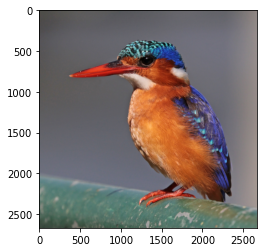

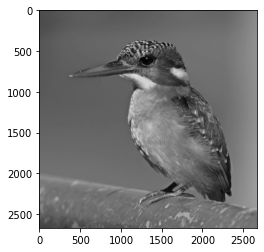

In [ ]:
img_b = cv2.imread('bird.jpg')
plt.imshow(img_b[:,:,::-1])
plt.show()
img_g = cv2.cvtColor(img_b, cv2.COLOR_BGR2GRAY)
plt.imshow(img_g, cmap='gray')
plt.show()

Ak chceme obrázok väčší, tak si musíme nastaviť veľkosť plátna.

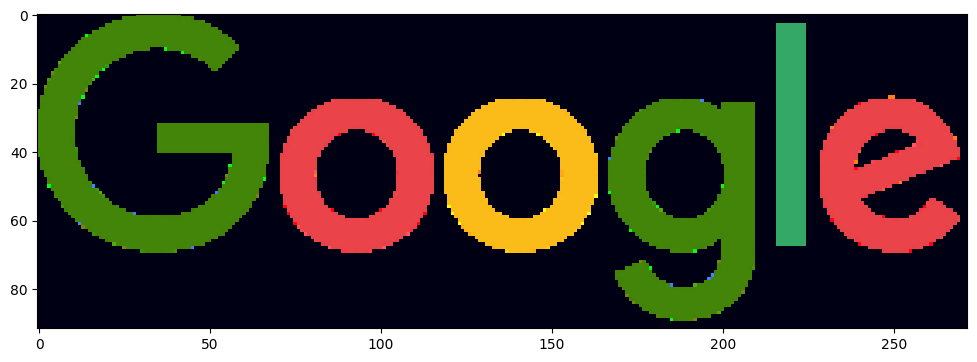

In [ ]:
fig=plt.figure(figsize=(12,8), dpi= 100)
plt.imshow(img[:, :, ::-1])
plt.show()

### Dokumentácia OpenCV
Pri hľadaní dokumentácie je často možné naraziť na rôzne verzie OpenCV. Tu je zoznam pre všetky:
https://docs.opencv.org/

Verziu si ľahko zistíme pomocou kódu:

In [ ]:
print(cv2.__version__)

4.6.0


## Využitie GPU

Google Colab ponúka zadarmo aj využitie GPU. To je však niekedy potrebné pre daný notebook aktivovať (niektoré notebooky sú už uložené s touto voľbou). Nastaviť si využitie GPU môžete hore v záložke **Runtime -> Change runtime type**

Môžeme dostať rôzne GPU. Aké presne si môžeme overiť pomocou príkazu `nvidia-smi`

In [ ]:
!nvidia-smi

Sat Nov 19 17:08:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    30W /  70W |   7026MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Úloha

Stiahnite si z internetu obrázok nejakého zvieraťa, ktoré ma hlavu. Môžete použiť Google Drive, wget, alebo akýkoľvek iný postup. Potom manuálne cropnite z obrázka hlavu zvieraťa a zobrazte ju.

## DeepDream

V prvej časti praktika si ukážeme algoritmus DeepDream. Tento algoritmus upravuje obrázok tak, aby sa čo najviac aktivovali niektoré aktivácie v hlbokej neurónovej sieti. Kód bude štrukturovaný podľa príkladu z [dokumentácie kerasu.](https://keras.io/examples/generative/deep_dream/)

Pre jednoduchosť si v nasledujúcom texte budeme niektoré premenné označovať ako vektory, aj keď pri výpočtoch sú to väčšinou tenzory 3., alebo 4. rádu. Npar. obrázok má rozmery: výšku $\times$ šírku $\times$ 3 kanály a je teda tenzor 3. rádu, ak dáme viac obrázkov z rovankými rozmermi "na seba", tak dostaneme tenzor 4. rádu.

### Gradientný zostup

Pri bežnom trénovaní siete sa jednolivé parametre obecne aktualizujú pomocou gradientného zostupu. Teda pre nejaký parameter $p_i$ z vektoru parametrov sieťe $vec{p}$ postupne aktualizujeme jeho hodnotu:

$$ p_i^{n+1} = p_i^n - \eta \frac{\partial L\left(\vec{x}, \vec{y}, \vec{p}\right)}{\partial p_i},$$

pričom $\eta$ je trénovací krok a L je nejaká stratová funkcia. Parciálne derivácie $\frac{\partial L}{\partial p}$ sa počítajú v jednom kroku pre konkrétne trénovacie dáta $\left(\vec{x}, \vec{y}\right)$ pomocou spätnej propagácie (backpropagation).Často sa samozrejme využívajú rôzne komplikovanejšie postupy optimalizácie. To však pre dnešok nebude podstatné.

### Postup DeepDream

Princíp DeepDreamu je veľmi podobný, ale namiesto paramterov siete budeme meniť vstupný obrázok $\vec{x}$, tak aby sme maximalizovali nejakú stratovú funkciu $L$. Zmena pre jeden pixel $x_i$ teda bude:

$$x_i^{n + 1} = x_i + \eta \frac{\partial F(\vec{x}, \vec{p})}{\partial x_i}$$

Môžme si všimnúť, že pre daný obrázok nebudeme potrebovať vôbec žiadne anotácia k našemu obrázku. Otázka samozrejme ostáva ako si zvolíme stratovú funkciu. Budú nás zaujímať aktivácie v sieti. Pre zjednodušenie si označme aktivácie po $i$-tej vrstve ako $\vec{A}_i$. Stratovú funkciu pre DeepDream potom môžeme definovať ako:

$$L(\vec{x}, \vec{p}) = \sum_{i=1}^n \frac{w_i}{|\vec{A}_i|} \sum_{k=1}^{|\vec{A}_i|} A_{i, k}(\vec{x}, \vec{p})$$

kde $|\vec{A}_i|$ je počet prvkov v danej aktivačnej mape, $w_i$ je nami zvolený váhový vektor. Pri iteráciách sa teda snažíme maximalozovať aktivácie v zvolených vrstvách.

### Implementácia

Najprv si ukážeme kód v kerase a tensorflowe, ktorý nám umožní takéto iterácie robiť. Ako sieť použijeme Inception-v3 predtrénovanú na Imagenete. Môžete si samozrejme vyskúšať použiť aj iné siete.

#### Pomocné funkcie

Najprv si definujeme pomocné funkcie na preprocessing obrázkov. To je potrebné, lebo predténovaná sieť očakáva, že vstupné obrázky budú mať takýto preprocessing. Je potom dôležité mať aj funkciu, ktorá tento preprocesing vráti naspäť. Môžte si všimnúť, že v tejto funkcii sa aj zaokrúhľujú hodnoty v obrázku. To je preto, lebo obrázok reprezentujeme pomocou `uint8`, ale počas optimalizácie používame floaty.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import inception_v3

In [ ]:
def preprocess_image(image_path):
    # Util function to open, resize and format pictures
    # into appropriate arrays.
    img = keras.preprocessing.image.load_img(image_path)
    img = keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = inception_v3.preprocess_input(img)
    return img


def deprocess_image(x):
    # Util function to convert a NumPy array into a valid image.
    x = x.reshape((x.shape[1], x.shape[2], 3))
    # Undo inception v3 preprocessing
    x /= 2.0
    x += 0.5
    x *= 255.0
    # Convert to uint8 and clip to the valid range [0, 255]
    x = np.clip(x, 0, 255).astype("uint8")
    return x

#### Výpočet aktivačných máp

Nasledujúci kód stiahne z internetu predtrénovanú sieť a následne vytvorí funkciu, ktorá vráti jednotlivé aktivačné mapy.

In [ ]:
# Build an InceptionV3 model loaded with pre-trained ImageNet weights
model = inception_v3.InceptionV3(weights="imagenet", include_top=False)

# Define the layers we want and their weights
layer_settings = {
    "mixed4": 1.0,
    "mixed5": 1.5,
    "mixed6": 2.0,
    "mixed7": 2.5,
}

# Get the symbolic outputs of each "key" layer (we gave them unique names).
outputs_dict = dict(
    [
        (layer.name, layer.output)
        for layer in [model.get_layer(name) for name in layer_settings.keys()]
    ]
)

# Set up a model that returns the activation values for every target layer
# (as a dict)
feature_extractor = keras.Model(inputs=model.inputs, outputs=outputs_dict)

#### Stratová funkcia

V ďalšom bloku si definujeme výpočet stratovej funkcie, tak ako sme si zadefinovali.

In [ ]:
def compute_loss_all_activations(input_image):
    features = feature_extractor(input_image)
    # Initialize the loss
    loss = tf.zeros(shape=())
    for name in features.keys():
        coeff = layer_settings[name]
        activation = features[name]
        # We avoid border artifacts by only involving non-border pixels in the loss.
        scaling = tf.reduce_prod(tf.cast(tf.shape(activation), "float32"))
        loss += coeff * tf.reduce_sum(tf.square(activation[:, 2:-2, 2:-2, :])) / scaling
    return loss

#### Gradientný vzostup

V nasledujúcom bloku je loop v ktorom sa postupne upravujú hodnoty pixelov vo vstupnom obrázku.

In [ ]:
@tf.function
def gradient_ascent_step(img, loss_fn, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = loss_fn(img)
    # Compute gradients.
    grads = tape.gradient(loss, img)
    # Normalize gradients.
    grads /= tf.maximum(tf.reduce_mean(tf.abs(grads)), 1e-6)
    img += learning_rate * grads
    return loss, img


def gradient_ascent_loop(img, loss_fn, iterations, learning_rate, max_loss=None):
    for i in range(iterations):
        loss, img = gradient_ascent_step(img, loss_fn, learning_rate)
        if max_loss is not None and loss > max_loss:
            break
        print("... Loss value at step %d: %.2f" % (i, loss))
    return img

#### Aplikácia DeepDreamu

V nasledujúcom kóde si aplikujeme postupnými iteráciami deep dream.



... Loss value at step 0: 0.56
... Loss value at step 1: 0.72
... Loss value at step 2: 0.93
... Loss value at step 3: 1.15
... Loss value at step 4: 1.38
... Loss value at step 5: 1.61
... Loss value at step 6: 1.85
... Loss value at step 7: 2.10
... Loss value at step 8: 2.35
... Loss value at step 9: 2.60
... Loss value at step 10: 2.85
... Loss value at step 11: 3.10
... Loss value at step 12: 3.35
... Loss value at step 13: 3.60
... Loss value at step 14: 3.84
... Loss value at step 15: 4.07
... Loss value at step 16: 4.31
... Loss value at step 17: 4.57
... Loss value at step 18: 4.79
... Loss value at step 19: 5.01
... Loss value at step 20: 5.26
... Loss value at step 21: 5.49
... Loss value at step 22: 5.70
... Loss value at step 23: 5.91
... Loss value at step 24: 6.16
... Loss value at step 25: 6.37
... Loss value at step 26: 6.58
... Loss value at step 27: 6.81
... Loss value at step 28: 7.00
... Loss value at step 29: 7.22
... Loss value at step 30: 7.44
... Loss value at 

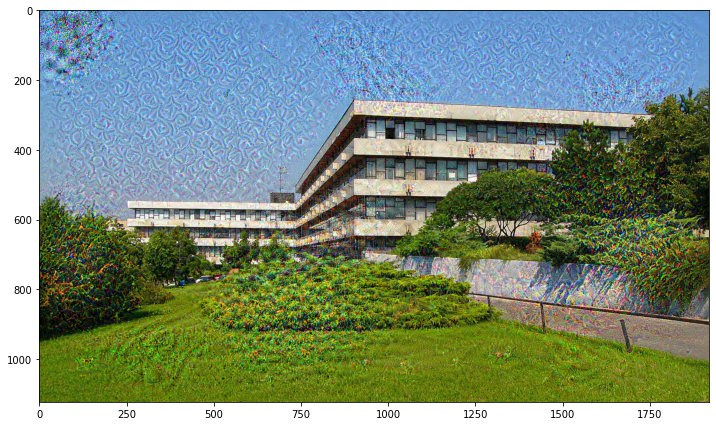

In [ ]:
base_image_path = keras.utils.get_file("fmfi.jpg", "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Fmfi_f1_zelen.jpg/640px-Fmfi_f1_zelen.jpg")

original_img = preprocess_image(base_image_path)
img = tf.identity(original_img)
deep_dream_img = gradient_ascent_loop(img, compute_loss_all_activations, iterations=1000, learning_rate=0.01, max_loss=100)

deep_dream_img = deprocess_image(deep_dream_img.numpy())

plt.figure(figsize=(12,8))
plt.imshow(deep_dream_img)
plt.show()

### Úloha

Skúste si naimplementovať vlastnú stratovú funkciu, ktorá bude zväčšovať iba jeden konkrétny kanál v jednej konkrétnej vrstve. Aby sa dala náš kód použiť tak stačí implementovať funkciu s rovnakou signatúrou ako `compute_loss_all_activatons`. Prípadne si môžete napísať funkciu, ktorá vráti túto funkciu na základe zadaného kanála, alebo aj konkrétneho neurónu. Návrh kódu pre ňu je nižšie.

In [ ]:
layer_settings = {
    "mixed4": 0.0,
    "mixed5": 0.0,
    "mixed6": 1.0,
    "mixed7": 0.0,
}

def compute_loss_single_channel(input_image):
  ...

... Loss value at step 0: 0.20
... Loss value at step 1: 1.13
... Loss value at step 2: 2.62
... Loss value at step 3: 4.26
... Loss value at step 4: 5.81
... Loss value at step 5: 7.42
... Loss value at step 6: 9.24
... Loss value at step 7: 10.96
... Loss value at step 8: 12.77
... Loss value at step 9: 14.55
... Loss value at step 10: 16.14
... Loss value at step 11: 17.92
... Loss value at step 12: 19.50
... Loss value at step 13: 21.32
... Loss value at step 14: 22.97
... Loss value at step 15: 24.77
... Loss value at step 16: 26.27
... Loss value at step 17: 27.99
... Loss value at step 18: 29.53
... Loss value at step 19: 31.17
... Loss value at step 20: 32.75
... Loss value at step 21: 34.30
... Loss value at step 22: 35.80
... Loss value at step 23: 37.24
... Loss value at step 24: 38.69
... Loss value at step 25: 40.16
... Loss value at step 26: 41.47
... Loss value at step 27: 42.97
... Loss value at step 28: 44.31
... Loss value at step 29: 45.58
... Loss value at step 30: 

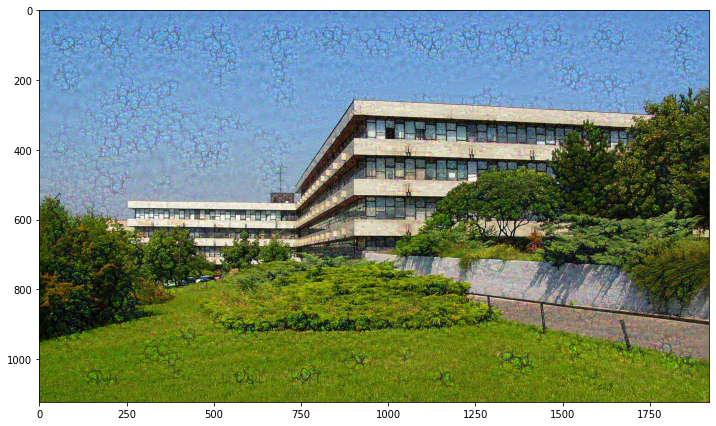

In [ ]:
base_image_path = keras.utils.get_file("fmfi.jpg", "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Fmfi_f1_zelen.jpg/640px-Fmfi_f1_zelen.jpg")

original_img = preprocess_image(base_image_path)
img = tf.identity(original_img)
deep_dream_img = gradient_ascent_loop(img, compute_loss_single_channel, iterations=100, learning_rate=0.01, max_loss=1000)

deep_dream_img = deprocess_image(deep_dream_img.numpy())

plt.figure(figsize=(12,8))
plt.imshow(deep_dream_img)
plt.show()

Teraz verzia kde môžeme funkciu generovať podľa názvu vrstvy a kanála.

In [ ]:
def compute_loss_channel_functor(layer_name, channel):
  ...

... Loss value at step 0: 0.00
... Loss value at step 1: 0.00
... Loss value at step 2: 0.00
... Loss value at step 3: 0.01
... Loss value at step 4: 0.01
... Loss value at step 5: 0.03
... Loss value at step 6: 0.00
... Loss value at step 7: 0.07
... Loss value at step 8: 0.02
... Loss value at step 9: 0.12
... Loss value at step 10: 0.09
... Loss value at step 11: 0.11
... Loss value at step 12: 0.49
... Loss value at step 13: 0.64
... Loss value at step 14: 1.47
... Loss value at step 15: 2.47
... Loss value at step 16: 2.36
... Loss value at step 17: 3.93
... Loss value at step 18: 5.05
... Loss value at step 19: 6.62
... Loss value at step 20: 8.23
... Loss value at step 21: 10.84
... Loss value at step 22: 11.72
... Loss value at step 23: 15.59
... Loss value at step 24: 14.51
... Loss value at step 25: 19.73
... Loss value at step 26: 21.79
... Loss value at step 27: 24.80
... Loss value at step 28: 29.51
... Loss value at step 29: 33.23
... Loss value at step 30: 35.34
... Loss

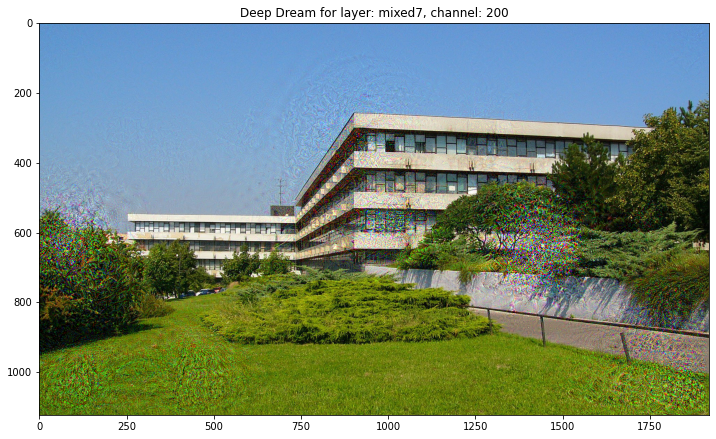

... Loss value at step 0: 0.00
... Loss value at step 1: 0.08
... Loss value at step 2: 0.27
... Loss value at step 3: 0.58
... Loss value at step 4: 0.94
... Loss value at step 5: 1.27
... Loss value at step 6: 1.71
... Loss value at step 7: 2.14
... Loss value at step 8: 2.62
... Loss value at step 9: 3.27
... Loss value at step 10: 3.77
... Loss value at step 11: 4.23
... Loss value at step 12: 4.99
... Loss value at step 13: 5.62
... Loss value at step 14: 6.38
... Loss value at step 15: 6.84
... Loss value at step 16: 7.68
... Loss value at step 17: 8.40
... Loss value at step 18: 9.12
... Loss value at step 19: 9.83
... Loss value at step 20: 10.29
... Loss value at step 21: 11.13
... Loss value at step 22: 11.81
... Loss value at step 23: 12.18
... Loss value at step 24: 12.89
... Loss value at step 25: 13.86
... Loss value at step 26: 14.48
... Loss value at step 27: 15.27
... Loss value at step 28: 15.98
... Loss value at step 29: 16.73
... Loss value at step 30: 17.58
... Los

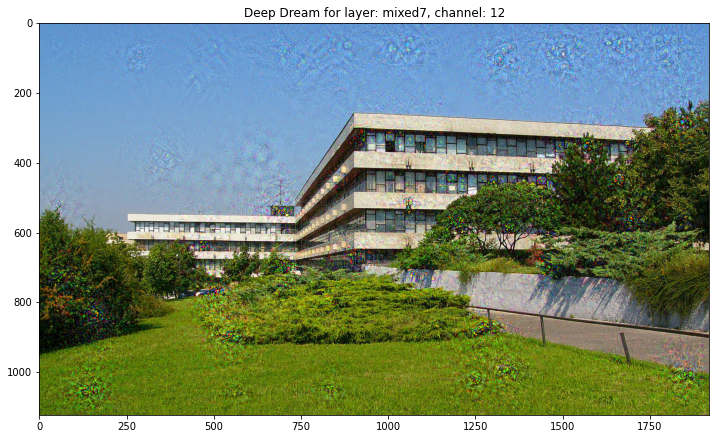

... Loss value at step 0: 0.00
... Loss value at step 1: 0.06
... Loss value at step 2: 0.26
... Loss value at step 3: 0.53
... Loss value at step 4: 0.89
... Loss value at step 5: 1.42
... Loss value at step 6: 2.23
... Loss value at step 7: 3.01
... Loss value at step 8: 4.16
... Loss value at step 9: 5.38
... Loss value at step 10: 6.07
... Loss value at step 11: 7.41
... Loss value at step 12: 8.68
... Loss value at step 13: 9.94
... Loss value at step 14: 10.97
... Loss value at step 15: 12.53
... Loss value at step 16: 13.57
... Loss value at step 17: 15.62
... Loss value at step 18: 16.71
... Loss value at step 19: 18.34
... Loss value at step 20: 19.21
... Loss value at step 21: 21.17
... Loss value at step 22: 22.29
... Loss value at step 23: 23.75
... Loss value at step 24: 24.90
... Loss value at step 25: 26.25
... Loss value at step 26: 27.97
... Loss value at step 27: 29.46
... Loss value at step 28: 31.05
... Loss value at step 29: 32.61
... Loss value at step 30: 34.33
.

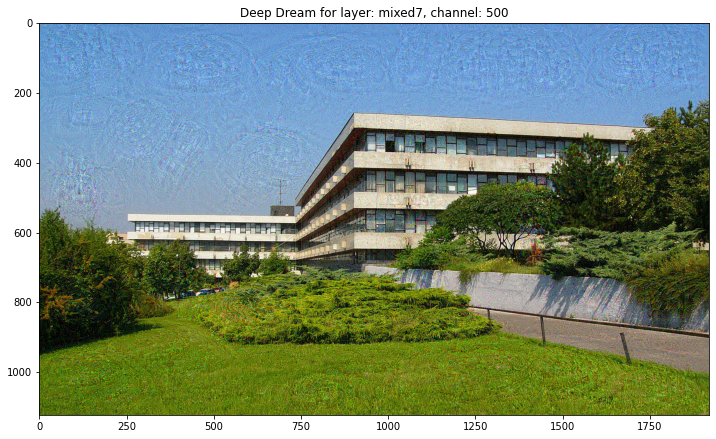

... Loss value at step 0: 0.21
... Loss value at step 1: 1.02
... Loss value at step 2: 2.27
... Loss value at step 3: 3.64
... Loss value at step 4: 5.07
... Loss value at step 5: 6.55
... Loss value at step 6: 8.04
... Loss value at step 7: 9.79
... Loss value at step 8: 11.48
... Loss value at step 9: 12.98
... Loss value at step 10: 14.74
... Loss value at step 11: 16.35
... Loss value at step 12: 18.08
... Loss value at step 13: 19.70
... Loss value at step 14: 21.36
... Loss value at step 15: 22.98
... Loss value at step 16: 24.65
... Loss value at step 17: 26.26
... Loss value at step 18: 27.92
... Loss value at step 19: 29.63
... Loss value at step 20: 31.10
... Loss value at step 21: 32.77
... Loss value at step 22: 34.46
... Loss value at step 23: 36.03
... Loss value at step 24: 37.62
... Loss value at step 25: 39.02
... Loss value at step 26: 40.69
... Loss value at step 27: 42.12
... Loss value at step 28: 43.51
... Loss value at step 29: 44.89
... Loss value at step 30: 4

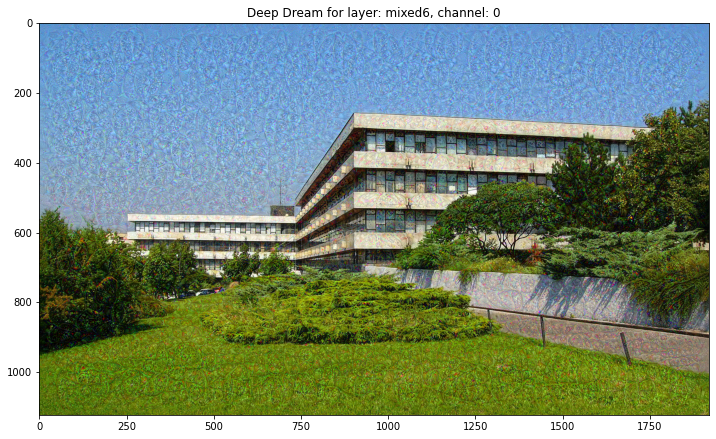

... Loss value at step 0: 0.30
... Loss value at step 1: 3.19
... Loss value at step 2: 8.60
... Loss value at step 3: 15.48
... Loss value at step 4: 22.68
... Loss value at step 5: 30.09
... Loss value at step 6: 37.65
... Loss value at step 7: 45.07
... Loss value at step 8: 52.35
... Loss value at step 9: 59.85
... Loss value at step 10: 67.03
... Loss value at step 11: 73.69
... Loss value at step 12: 80.70
... Loss value at step 13: 87.36
... Loss value at step 14: 94.01
... Loss value at step 15: 100.40
... Loss value at step 16: 106.50
... Loss value at step 17: 112.46
... Loss value at step 18: 118.50
... Loss value at step 19: 124.15
... Loss value at step 20: 129.78
... Loss value at step 21: 135.31
... Loss value at step 22: 140.63
... Loss value at step 23: 145.74
... Loss value at step 24: 150.89
... Loss value at step 25: 155.94
... Loss value at step 26: 160.84
... Loss value at step 27: 165.65
... Loss value at step 28: 170.32
... Loss value at step 29: 175.06
... Loss

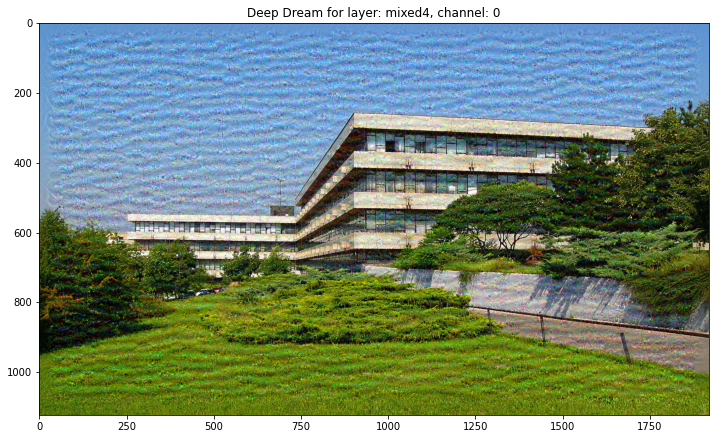

In [ ]:
base_image_path = keras.utils.get_file("fmfi.jpg", "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Fmfi_f1_zelen.jpg/640px-Fmfi_f1_zelen.jpg")

original_img = preprocess_image(base_image_path)
img = tf.identity(original_img)

params = (('mixed7', 200), ('mixed7', 12), ('mixed7', 500), ('mixed6', 0), ('mixed4', 0))

for layer_name, channel in params:
  loss_fn = compute_loss_channel_functor(layer_name, channel)
  deep_dream_img = gradient_ascent_loop(img, loss_fn, iterations=100, learning_rate=0.01, max_loss=1000)
  deep_dream_img = deprocess_image(deep_dream_img.numpy())
  plt.figure(figsize=(12,8))
  plt.imshow(deep_dream_img)
  plt.title("Deep Dream for layer: {}, channel: {}".format(layer_name, channel))
  plt.show()

### Vylepšenie

Obrázky z DeepDreamu môžme vylepšiť tak, že postupne budeme iterovať na obrázku zmenšenom na inú škálu. Toto vytvorí zaujímavejšie príznaky. Nasledujúci kód funguje pre jednu iteráciu. Môžete si skúsiť spustiť aj po jednotlivých kanáloch.

Processing octave 0 with shape (409, 699)
... Loss value at step 0: 0.11
... Loss value at step 1: 0.15
... Loss value at step 2: 0.20
... Loss value at step 3: 0.24
... Loss value at step 4: 0.28
... Loss value at step 5: 0.33
... Loss value at step 6: 0.37
... Loss value at step 7: 0.41
... Loss value at step 8: 0.44
... Loss value at step 9: 0.49
... Loss value at step 10: 0.53
... Loss value at step 11: 0.57
... Loss value at step 12: 0.61
... Loss value at step 13: 0.65
... Loss value at step 14: 0.68
... Loss value at step 15: 0.72
... Loss value at step 16: 0.76
... Loss value at step 17: 0.80
... Loss value at step 18: 0.83
... Loss value at step 19: 0.86
... Loss value at step 20: 0.90
... Loss value at step 21: 0.94
... Loss value at step 22: 0.97
... Loss value at step 23: 1.00
... Loss value at step 24: 1.04
... Loss value at step 25: 1.08
... Loss value at step 26: 1.11
... Loss value at step 27: 1.13
... Loss value at step 28: 1.18
... Loss value at step 29: 1.20
... Loss

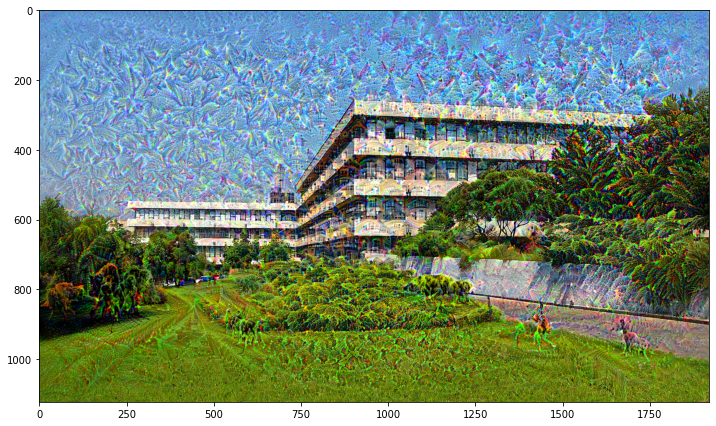

In [ ]:
bas_img_path = keras.utils.get_file("fmfi_large.jpg", "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Fmfi_f1_zelen.jpg/1231px-Fmfi_f1_zelen.jpg")
original_img = preprocess_image(base_image_path)
original_shape = original_img.shape[1:3]

num_octave = 4
octave_scale = 1.4

successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]
shrunk_original_img = tf.image.resize(original_img, successive_shapes[0])

img = tf.identity(original_img)  # Make a copy
for i, shape in enumerate(successive_shapes):
  print("Processing octave %d with shape %s" % (i, shape))
  img = tf.image.resize(img, shape)
  img = gradient_ascent_loop(img, compute_loss_all_activations, iterations=100, learning_rate=0.01, max_loss=100)
  upscaled_shrunk_original_img = tf.image.resize(shrunk_original_img, shape)
  same_size_original = tf.image.resize(original_img, shape)
  lost_detail = same_size_original - upscaled_shrunk_original_img

  img += lost_detail
  shrunk_original_img = tf.image.resize(original_img, shape)

deep_dream_img = deprocess_image(img.numpy())

plt.figure(figsize=(12,8))
plt.imshow(deep_dream_img)
plt.show()